In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy as scipy
%matplotlib inline

Для выполнения задания выбираем распределение хи-квадрат $\chi^2_k$ - это распределение суммы квадратов k независимых стандартных нормальных случайных величин - с параметром k = 9.

In [4]:
k = 9 ##число степеней свободы
rv = sts.chi2(k) ##создаем распределение

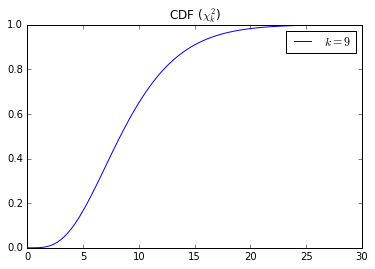

In [5]:
##Построим график функции распределения:
x = np.linspace(0,30,100)
cdf = rv.cdf(x)
plt.plot(x, cdf, label="$k=%s$" % k)
plt.legend()
plt.title("CDF ($\chi^2_k$)")

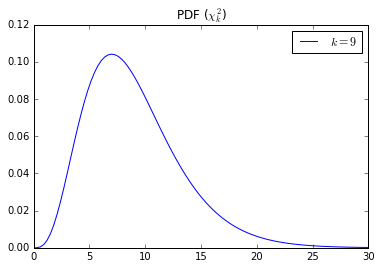

In [6]:
##Построим график функции плотности вероятности:
x = np.linspace(0,30,100)
pdf = rv.pdf(x)
plt.plot(x, pdf, label="$k=%s$" % k)
plt.legend()
plt.title("PDF ($\chi^2_k$)")

Генерируем выборку объемом 1000, нарисуем гистограмму выборки, а поверх нее теоретическую плотность распределения.

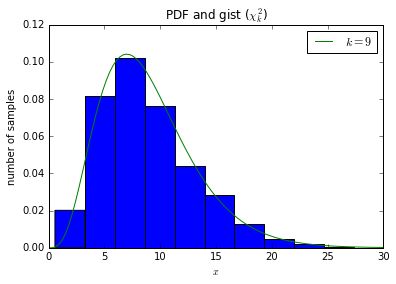

In [7]:
sample = rv.rvs(size=1000)
plt.hist(sample, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')
plt.plot(x, pdf, label="$k=%s$" % k)
plt.legend()
plt.title("PDF and gist ($\chi^2_k$)")

In [19]:
## Создадим функцию, генерирующую 1000 выборок объема n, 
## Для каждой выборки считаем среднее и выводим гистограмму распределения выборочных средних 
## с наложенным графиком плотности нормального распределения. 
def func(n):
    
    ##Для распределения $\chi^2_k$ мат. ожидание и диспресия равны k и 2k соответственно. 
    ##Поэтому для нормального распределения, которым приближается рапределение выборочных средних:
    mu = k
    sigma = (2*k/n)**0.5
    print mu, sigma
    
    # зададим нормально распределенную случайную величину
    norm_rv = sts.norm(loc=mu, scale=sigma)
    # Для построения графика плотности вероятности нормального распределения:
    x = np.linspace(0,20,100)
    pdf = norm_rv.pdf(x)
    
    i = 0
    av_list = []
    while i < 1000:
        sample = rv.rvs(size=n)
        av = scipy.mean(sample)
        av_list.append(av)
        i += 1
    plt.hist(av_list, normed=True)
    plt.ylabel('number of samples')
    plt.xlabel('$x$')
    plt.plot(x, pdf)

Строим графики для n = 1, 5, 10, 50

9 4.24264068712


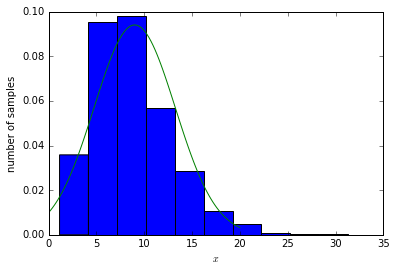

In [20]:
func(1.)

9 1.8973665961


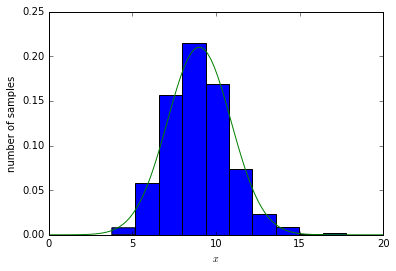

In [21]:
func(5.)

9 1.3416407865


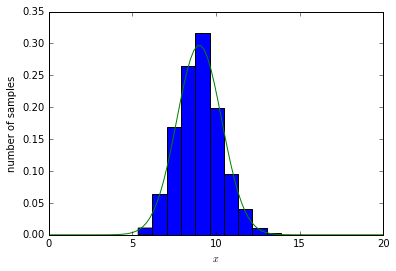

In [22]:
func(10.)

9 0.6


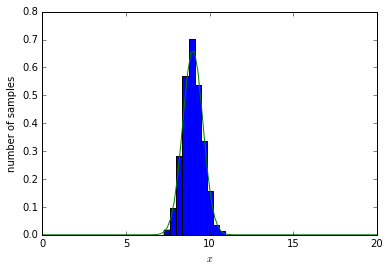

In [23]:
func(50.)

## Вывод:
Из графиков видно, что при увеличении n распределение средних становится более симмметричным и точность аппроксимации увеличивается.